In [1]:
import aqdatac
aqdatac.login('huangchunyang', password='20020308hd')

In [2]:
aqdatac.current_session()

aqdatac: version 0.2.3
current user: huangchunyang
current session expires at: 2024-08-09 10:52:43


In [3]:
aqdatac.accessible_tables()

{'aindexcsi500weight': ['*'],
 'aindexhs300closeweight': ['*'],
 'aindexhs300freeweight': ['*'],
 'ashareeodprices': ['2009-01-01, 2019-12-31'],
 'cftick': ['2019-01-01,2019-07-01'],
 'cfuturescalendar': ['*'],
 'chinaetfpchredmlist': ['*'],
 'chinaetfpchredmmembers': ['*'],
 'csbar_1d': ['2009-01-01, 2019-12-31'],
 'csbar_30m': ['2015-01-01, 2019-12-31'],
 'csdate': ['*'],
 'csinfo': ['*'],
 'csord': ['2019-01-01,2019-07-01'],
 'cstick': ['2019-01-01,2019-07-01'],
 'cstra': ['2019-01-01,2019-07-01']}

In [4]:
df = aqdatac.get_data("csinfo",row_filter="producttype='a'") 

In [5]:
df = df[df['status'] == 'active']

In [6]:
df

,sym,name,producttype,status,listeddate,delisteddate,issue_price
0,000001.SZ,平安银行,a,active,1991-04-03,<NA>,40.0
1,000002.SZ,万科A,a,active,1991-01-29,<NA>,1.0
3,000004.SZ,国华网安,a,active,1990-12-01,<NA>,1.0
4,000005.SZ,ST星源,a,active,1990-12-10,<NA>,10.0
5,000006.SZ,深振业A,a,active,1992-04-27,<NA>,10.0
...,...,...,...,...,...,...,...
5353,688799.SH,华纳药厂,a,active,2021-07-13,<NA>,30.82
5354,688800.SH,瑞可达,a,active,2021-07-22,<NA>,15.02
5355,688819.SH,天能股份,a,active,2021-01-18,<NA>,41.79
5356,688981.SH,中芯国际,a,active,2020-07-16,<NA>,27.46


In [7]:
import pandas as pd
start_date_str, end_date_str = "2019-05-01", "2019-06-01"
start_date, end_date = pd.to_datetime(start_date_str), pd.to_datetime(end_date_str)
sym_list = df['sym'].tolist()
type(sym_list)

list

In [8]:
df_30m = aqdatac.get_data("csbar_30m", start_date, end_date, sym_list)
df_30m

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount
0,2019-05-06,2019-05-06 10:00:00,000001.SZ,13.1,13.35,12.92,13.11,72690955.0,956082159.02,22761.0
1,2019-05-06,2019-05-06 10:00:00,000002.SZ,28.0,28.31,27.72,27.8,17366709.0,485159508.03,16972.0
2,2019-05-06,2019-05-06 10:00:00,000004.SZ,24.23,24.9,22.75,23.98,936000.0,22170801.0,1537.0
3,2019-05-06,2019-05-06 10:00:00,000005.SZ,3.26,3.26,3.1,3.18,3642500.0,11505065.0,1299.0
4,2019-05-06,2019-05-06 10:00:00,000006.SZ,5.94,5.94,5.67,5.79,6156544.0,35630889.86,2548.0
...,...,...,...,...,...,...,...,...,...,...
555039,2019-05-31,2019-05-31 15:00:00,603991.SH,19.95,20.14,19.79,19.98,153500.0,3059219.0,231.0
555040,2019-05-31,2019-05-31 15:00:00,603993.SH,4.05,4.07,4.03,4.03,13511401.0,54676254.5,3612.0
555041,2019-05-31,2019-05-31 15:00:00,603997.SH,7.58,7.63,7.55,7.57,733200.0,5553613.0,732.0
555042,2019-05-31,2019-05-31 15:00:00,603998.SH,8.74,8.79,8.7,8.74,2333600.0,20400008.0,1651.0


In [9]:
df_30m_0 = df_30m[df_30m['datetime'].dt.time == pd.to_datetime('10:00:00').time()] 
print(len(df_30m_0))

69385


In [10]:
df_30m_0_trade = df_30m_0[df_30m_0['volume']!=0]
print(len(df_30m_0_trade))

69385


In [11]:
sym_list_top100 = df_30m_0_trade[['sym', 'turnover']].groupby('sym').mean().nlargest(100, 'turnover').index

In [12]:
sym_list_top100

Index(['601318.SH', '600519.SH', '000858.SZ', '000063.SZ', '000651.SZ',
       '600410.SH', '000723.SZ', '600352.SH', '600030.SH', '002547.SZ',
       '600536.SH', '000333.SZ', '600460.SH', '002456.SZ', '600111.SH',
       '300059.SZ', '002415.SZ', '000876.SZ', '600989.SH', '000650.SZ',
       '002157.SZ', '000713.SZ', '300292.SZ', '002600.SZ', '000795.SZ',
       '600776.SH', '000831.SZ', '002057.SZ', '600887.SH', '600703.SH',
       '002467.SZ', '000725.SZ', '000066.SZ', '600036.SH', '600276.SH',
       '002049.SZ', '000977.SZ', '601166.SH', '600584.SH', '000568.SZ',
       '603019.SH', '002481.SZ', '002119.SZ', '600624.SH', '002475.SZ',
       '300498.SZ', '300184.SZ', '600366.SH', '300033.SZ', '600604.SH',
       '600309.SH', '002565.SZ', '000001.SZ', '600031.SH', '600570.SH',
       '600198.SH', '002714.SZ', '600487.SH', '300353.SZ', '600392.SH',
       '300152.SZ', '000338.SZ', '600206.SH', '600516.SH', '002385.SZ',
       '600259.SH', '300017.SZ', '002299.SZ', '600598.SH', '3001

In [13]:
df_train = df_30m_0_trade[df_30m_0_trade['sym'].isin(sym_list_top100)]
df_train['date'] = pd.to_datetime(df_train['date'])
df_train

/tmp/ipykernel_16028/1660598010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'])


,date,datetime,sym,open,high,low,close,volume,turnover,tradecount
0,2019-05-06,2019-05-06 10:00:00,000001.SZ,13.1,13.35,12.92,13.11,72690955.0,956082159.02,22761.0
1,2019-05-06,2019-05-06 10:00:00,000002.SZ,28.0,28.31,27.72,27.8,17366709.0,485159508.03,16972.0
44,2019-05-06,2019-05-06 10:00:00,000063.SZ,29.3,30.69,29.2,30.48,57769846.0,1724011306.64,52242.0
46,2019-05-06,2019-05-06 10:00:00,000066.SZ,8.39,8.65,8.34,8.49,19103257.0,161177314.39,9261.0
49,2019-05-06,2019-05-06 10:00:00,000070.SZ,13.9,14.09,13.7,13.9,11205178.0,155416277.4,11519.0
...,...,...,...,...,...,...,...,...,...,...
530135,2019-05-31,2019-05-31 10:00:00,601336.SH,52.68,53.07,52.41,52.74,3598005.0,189988520.04,5149.0
530145,2019-05-31,2019-05-31 10:00:00,601398.SH,5.65,5.66,5.63,5.65,27154549.0,153215413.05,3379.0
530149,2019-05-31,2019-05-31 10:00:00,601519.SH,6.79,6.9,6.72,6.78,19007600.0,129450707.0,10625.0
530177,2019-05-31,2019-05-31 10:00:00,601688.SH,18.72,18.83,18.68,18.76,7962921.0,149361095.07,5564.0


In [14]:
df_train_sort = df_train.sort_values(by=['sym', 'date'])
df_train_sort

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount
0,2019-05-06,2019-05-06 10:00:00,000001.SZ,13.1,13.35,12.92,13.11,72690955.0,956082159.02,22761.0
27655,2019-05-07,2019-05-07 10:00:00,000001.SZ,13.03,13.08,12.9,13.05,26732606.0,347469979.23,11183.0
55316,2019-05-08,2019-05-08 10:00:00,000001.SZ,12.72,12.72,12.5,12.58,32095151.0,404667070.11,14042.0
82994,2019-05-09,2019-05-09 10:00:00,000001.SZ,12.52,12.58,12.34,12.35,29040734.0,361348554.28,11536.0
110714,2019-05-10,2019-05-10 10:00:00,000001.SZ,12.34,12.62,12.33,12.57,33375719.0,416580414.79,15885.0
...,...,...,...,...,...,...,...,...,...,...
419000,2019-05-27,2019-05-27 10:00:00,603019.SH,38.68,39.72,38.51,39.35,5025815.0,197068422.1,7707.0
446822,2019-05-28,2019-05-28 10:00:00,603019.SH,40.7,41.44,40.41,40.93,8540541.0,350360137.43,13385.0
474631,2019-05-29,2019-05-29 10:00:00,603019.SH,39.99,40.19,39.6,39.7,5770562.0,230186408.58,8830.0
502450,2019-05-30,2019-05-30 10:00:00,603019.SH,39.48,39.5,38.61,38.8,5809780.0,226541378.96,10441.0


In [15]:
# df_train_sort.groupby('sym')['volume'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df_train_sort['volume_prev_5d_avg'] = df_train_sort.groupby('sym')['volume'].apply(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()).reset_index(level=0, drop=True)

In [16]:
df_train_sort

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount,volume_prev_5d_avg
0,2019-05-06,2019-05-06 10:00:00,000001.SZ,13.1,13.35,12.92,13.11,72690955.0,956082159.02,22761.0,NaN
27655,2019-05-07,2019-05-07 10:00:00,000001.SZ,13.03,13.08,12.9,13.05,26732606.0,347469979.23,11183.0,7.269096e+07
55316,2019-05-08,2019-05-08 10:00:00,000001.SZ,12.72,12.72,12.5,12.58,32095151.0,404667070.11,14042.0,4.971178e+07
82994,2019-05-09,2019-05-09 10:00:00,000001.SZ,12.52,12.58,12.34,12.35,29040734.0,361348554.28,11536.0,4.383957e+07
110714,2019-05-10,2019-05-10 10:00:00,000001.SZ,12.34,12.62,12.33,12.57,33375719.0,416580414.79,15885.0,4.013986e+07
...,...,...,...,...,...,...,...,...,...,...,...
419000,2019-05-27,2019-05-27 10:00:00,603019.SH,38.68,39.72,38.51,39.35,5025815.0,197068422.1,7707.0,1.161657e+07
446822,2019-05-28,2019-05-28 10:00:00,603019.SH,40.7,41.44,40.41,40.93,8540541.0,350360137.43,13385.0,9.563376e+06
474631,2019-05-29,2019-05-29 10:00:00,603019.SH,39.99,40.19,39.6,39.7,5770562.0,230186408.58,8830.0,9.594306e+06
502450,2019-05-30,2019-05-30 10:00:00,603019.SH,39.48,39.5,38.61,38.8,5809780.0,226541378.96,10441.0,8.336060e+06


In [17]:
df_train_sort_dropna = df_train_sort.dropna()
print(len(df_train_sort_dropna))

1868


In [18]:
df_train_sort_dropna[['date', 'sym', 'volume', 'volume_prev_5d_avg']].reset_index(drop=True).to_csv('./train_set.csv')

In [19]:
volume = df_train_sort_dropna['volume']
volume_prev_5d_avg = df_train_sort_dropna['volume_prev_5d_avg']
delta_volume = (volume_prev_5d_avg - volume) / volume
delta_volume_percent = round(delta_volume * 100, 2)

In [20]:
df_train_sort_dropna.iloc[delta_volume_percent.argmax()-5: delta_volume_percent.argmax()+2]

,date,datetime,sym,open,high,low,close,volume,turnover,tradecount,volume_prev_5d_avg
140887,2019-05-13,2019-05-13 10:00:00,600518.SH,5.78,6.05,5.78,5.92,164322901.0,962522950.17,66211.0,54810394.8
168590,2019-05-14,2019-05-14 10:00:00,600518.SH,5.6,5.68,5.33,5.44,100242606.0,551639851.78,51509.0,87415815.0
196299,2019-05-15,2019-05-15 10:00:00,600518.SH,5.77,5.8,5.6,5.66,53196247.0,303177826.31,25687.0,107227576.2
224012,2019-05-16,2019-05-16 10:00:00,600518.SH,5.85,5.85,5.75,5.81,45814606.0,266270546.51,19739.0,117556485.6
251745,2019-05-17,2019-05-17 10:00:00,600518.SH,6.58,6.65,6.25,6.58,135315467.0,882659676.0,63815.0,125652406.8
307247,2019-05-21,2019-05-21 10:00:00,600518.SH,6.31,6.31,6.31,6.31,145100.0,915581.0,113.0,99778365.4
335021,2019-05-22,2019-05-22 10:00:00,600518.SH,5.99,5.99,5.99,5.99,300100.0,1797599.0,108.0,66942805.2


raw:  1868 sorted:  1861


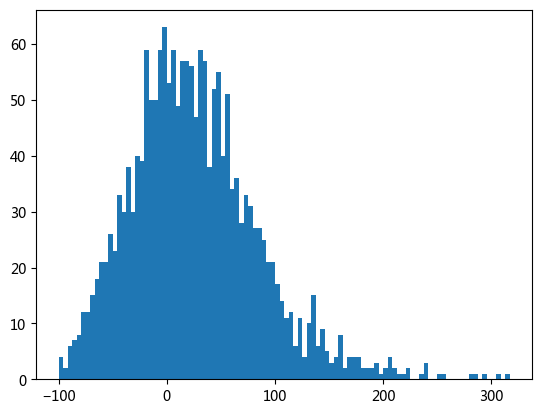

In [21]:
from matplotlib import pyplot as plt
sort = delta_volume_percent < 500
print('raw: ', len(delta_volume_percent), 'sorted: ', len(delta_volume_percent[sort]))
plt.hist(delta_volume_percent[sort], bins=100)
plt.show()